In [20]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('/config/workspace/Dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

"We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.\n",
    "Let's deal with that. we can either remove such data or simply replace it with their respective mean values.\n",
    "Let's do the latter.

In [24]:
data['Pregnancies'] = data['Pregnancies'].replace(0,data['Pregnancies'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

In [25]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f912c7fdb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f912c7910d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f912c7fd8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f912c791610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f912c7918b0>],
 'means': []}

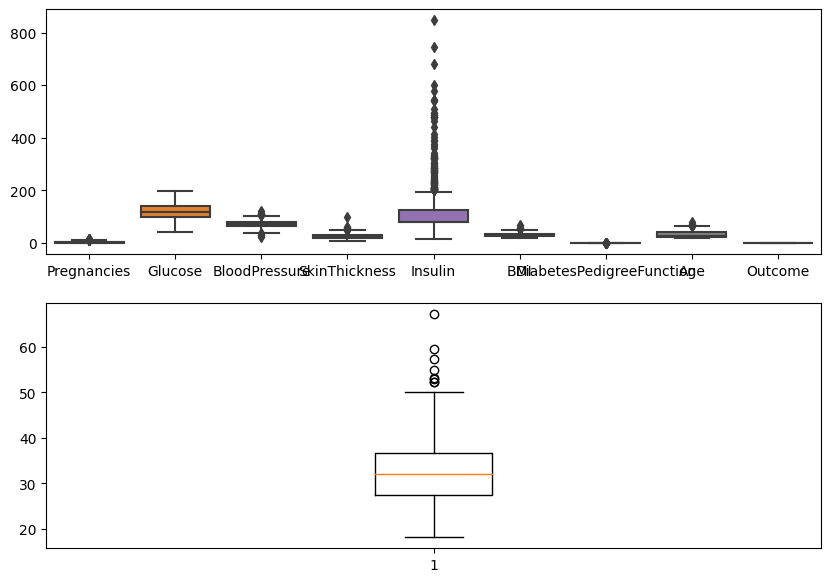

In [26]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.boxplot(data=data) # when sns is used box plot can be created for all the columns
plt.subplot(2,1,2)
plt.boxplot(data=data,x='BMI') # when plt is used box plot can only be created for one column

In [27]:
X = data.drop('Outcome', axis = 1)
y = data['Outcome']

In [28]:
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [29]:
#We have outliers in our data. In order to overcome that we are standardizing the data using standard scaler
import pickle
def standardization(X_train,X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #saving the model
    file = open('/config/workspace/models/scaler.pkl', 'wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled,X_test_scaled




In [30]:
X_train_scaled,X_test_scaled = standardization(X_train,X_test)

In [31]:
X_train_scaled

array([[ 0.8359714 ,  0.93644016,  0.45816047, ...,  0.36864973,
         0.67740401,  1.69955804],
       [-0.1551076 , -0.81628595, -1.03864035, ..., -0.63292879,
        -0.07049698, -0.96569189],
       [-0.20629614,  1.43249471,  1.45602768, ...,  2.81536295,
        -0.11855487, -0.88240283],
       ...,
       [-0.1551076 , -0.91549686, -0.62286235, ..., -1.13371805,
        -0.95656442, -1.04898095],
       [ 2.15741006, -1.2131296 ,  0.12553806, ..., -0.36107176,
        -0.50001442,  0.11706589],
       [ 0.17525206,  0.4734559 ,  0.79078287, ..., -0.09027668,
         0.52121586,  2.94889395]])

In [32]:
log_regressor = LogisticRegression()

In [33]:
#Hyperparameter tuning
parameter = {'C' : np.logspace(-1,5,7), 'penalty':('l1', 'l2', 'elasticnet'), 'solver':
('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga')}

In [34]:
from sklearn.model_selection import RandomizedSearchCV


In [35]:
ran_class = RandomizedSearchCV(log_regressor,param_distributions=parameter,n_iter=20,
cv =10, scoring = 'accuracy')

In [36]:
import warnings
warnings.filterwarnings('ignore')
ran_class.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
                                        'penalty': ('l1', 'l2', 'elasticnet'),
                                        'solver': ('lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga')},
                   scoring='accuracy')

In [37]:
ran_class.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}

In [38]:
ran_class.best_score_

0.7621099947117926

Testing with the help of test data

In [39]:
y_pred = ran_class.predict(X_test_scaled)

In [40]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8181818181818182
[[98  9]
 [19 28]]


In [41]:
log_reg = LogisticRegression(solver = 'newton-cg',C=10, penalty='l2')

In [42]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression(C=10, solver='newton-cg')

In [43]:
file = open('/config/workspace/models/log_regressor.pkl','wb')

In [44]:
pickle.dump(log_reg,file)
file.close()

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
new_data = scaler.transform([[2,197,70,45,543,30.5,0.158,53]])

In [52]:
res = log_reg.predict(new_data)
print(res[0])

1


In [ ]:
2,197,70,45,543,30.5,0.158,53,1